In [1]:
from __future__ import print_function
%matplotlib inline
from pylab import *

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

import skimage
from skimage import *
from skimage.color import *
from skimage import io
import numpy as np

In [23]:
def NeNe(img, scaleFac):
    imgShape = img.shape

    widht = imgShape[0]
    height = imgShape[1]

    widhtScaled  = int(widht * scaleFac)
    heightScaled  = int(height * scaleFac)

    scaleFac = (widhtScaled - 1) / (widht - 1)

    imgNew = np.random.randint( 5, size = (widhtScaled, heightScaled, 3) )

    for j in range(0, heightScaled):
        for i in range(0, widhtScaled):

            x = i/scaleFac
            y = j/scaleFac
            x1 = int(x)
            x2 = x1 + 1
            y1 = int(y)
            y2 = y1 + 1

            x2ind = x2
            y2ind = y2

            if x2 >= widht:
                x2ind = x2-1
            if y2 >= height:
                y2ind = y2-1

            if x - x1 < 0.5 :
                if y - y1 < 0.5:
                    newPix = img[x1, y1]
                else:
                    newPix = img[x1, y2ind]
            else:
                if y - y1 < 0.5:
                    newPix = img[x2ind, y1]
                else:
                    newPix = img[x2ind, y2ind]
                    
            imgNew[i, j, 0] = newPix[0]
            imgNew[i, j, 1] = newPix[1]
            imgNew[i, j, 2] = newPix[2]         

    return imgNew

In [7]:
def BinLin(img, scaleFac):
    
    
    imgShape = img.shape
    
    widht = imgShape[0]
    height = imgShape[1]

    widhtScaled  = int(widht * scaleFac)
    heightScaled  = int(height * scaleFac)

    scaleFac = (widhtScaled - 1) / (widht - 1)

    imgNew = np.random.randint( 5, size = (widhtScaled, heightScaled, 3) )

    for j in range(0, heightScaled):
        for i in range(0, widhtScaled):
                x = i/scaleFac
                y = j/scaleFac

                x1 = int(x)
                x2 = x1 + 1
                y1 = int(y)
                y2 = y1 + 1
                x2ind = x2
                y2ind = y2


                if x2 >= widht:
                    x2ind = x2-1
                if y2 >= height:
                    y2ind = y2-1

                for k in range(0, 3):
                    fxy1 = (x2 - x) * img[x1, y1, k] + (x - x1) * img[x2ind, y1, k]
                    fxy2 = (x2 - x) * img[x1, y2ind, k] + (x - x1) * img[x2ind, y2ind, k]
                    imgNew[i, j, k] = int((y2 - y) * fxy1 + (y - y1) * fxy2)

    return imgNew

In [21]:
imgOrg = io.imread('data/lena.png')
img2 = io.imread('myData/lena2.png')
img4 = io.imread('myData/lena4.png')
img8 = io.imread('myData/lena8.png')

img2.shape
img4.shape
imgOrg.shape
print(img8)

[[[226 136 121 209]
  [225 133 116 232]
  [223 131 109 230]
  ...
  [195  94  94 230]
  [198  95  96 232]
  [198 108 105 209]]

 [[226 131 109 235]
  [226 130 107 255]
  [226 129 106 255]
  ...
  [209 103  98 255]
  [161  68  82 255]
  [ 91  20  63 235]]

 [[225 129 108 230]
  [227 131 106 255]
  [225 130 108 255]
  ...
  [156  65  81 255]
  [ 84  20  64 255]
  [ 90  21  63 230]]

 ...

 [[114  43  72 230]
  [148  91 112 255]
  [189 164 161 255]
  ...
  [150  81 102 255]
  [118  42  70 255]
  [107  34  65 230]]

 [[ 95  28  62 235]
  [122  60  91 255]
  [204 176 170 255]
  ...
  [130  59  84 255]
  [104  30  62 255]
  [104  28  59 235]]

 [[ 89  22  58 209]
  [112  48  82 232]
  [219 187 175 230]
  ...
  [ 99  27  60 230]
  [102  30  62 232]
  [150  57  76 209]]]


Text(0.5, 1.0, 'Upscaled 8 times to Original - 512x512')

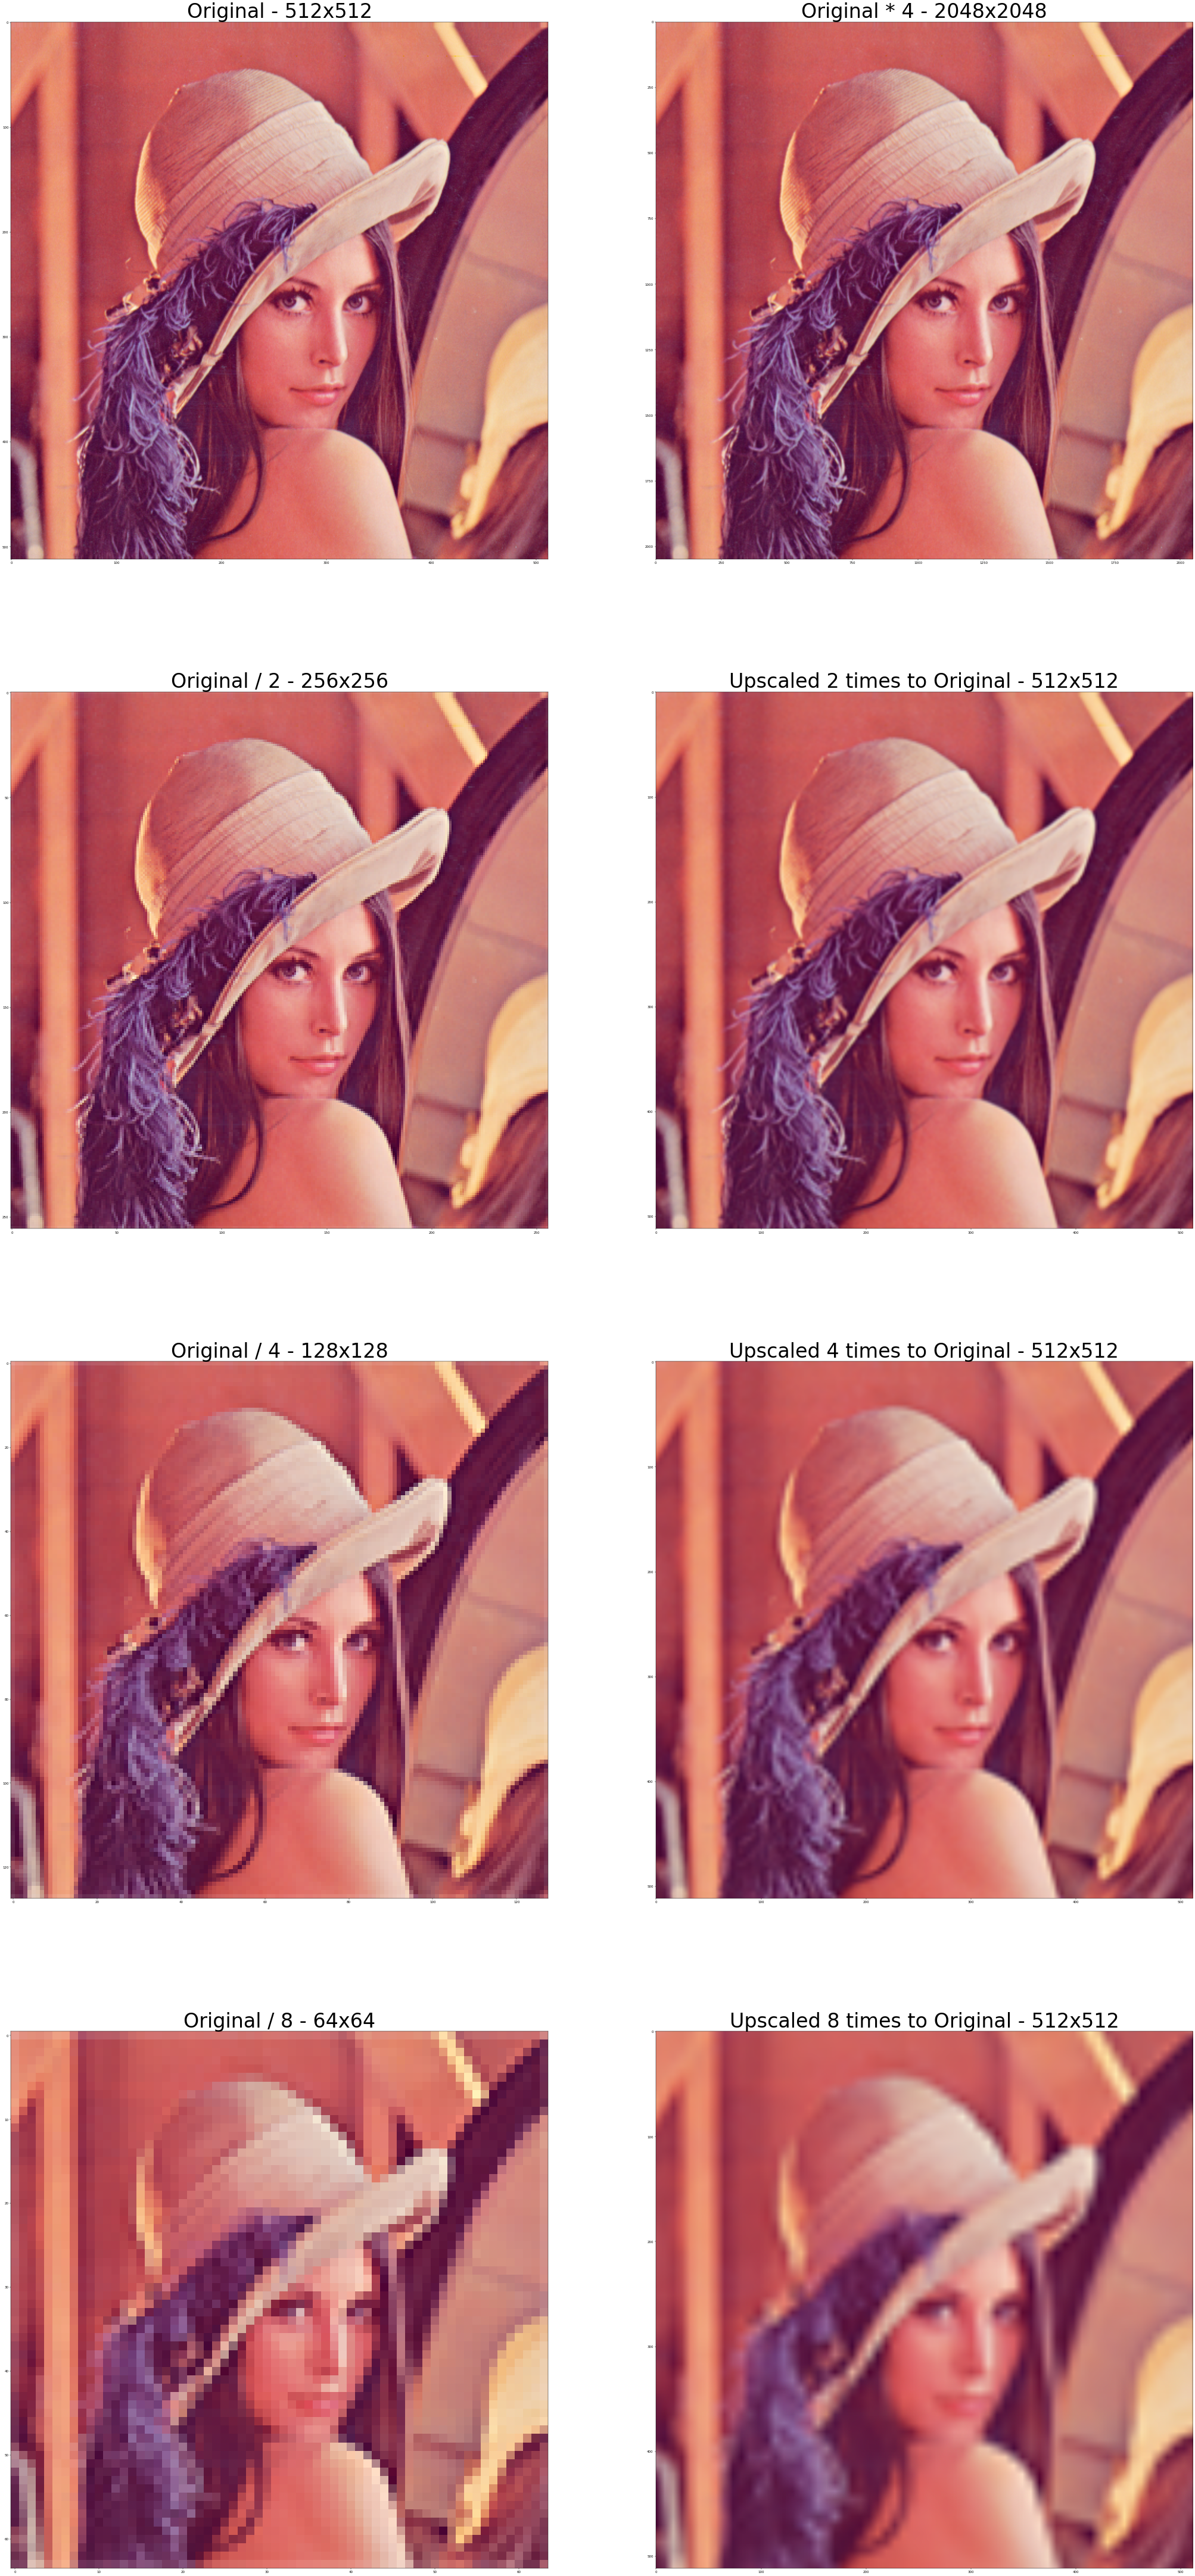

In [25]:
#NRNB


imgOrgsc = BinLin(imgOrg, 4)
img2sc = BinLin(img2, 2)
img4sc = BinLin(img4, 4)
img8sc = BinLin(img8, 8)


fig, ax = subplots(4, 2, figsize=(64,140), dpi=40, sharex=False)
#tight_layout()

ax[0, 0].imshow(imgOrg)
ax[0, 1].imshow(imgOrgsc)
ax[1, 0].imshow(img2)
ax[1, 1].imshow(img2sc)
ax[2, 0].imshow(img4)
ax[2, 1].imshow(img4sc)
ax[3, 0].imshow(img8)
ax[3, 1].imshow(img8sc)

ax[0, 0].set_title('Original - 512x512', fontsize = 60)
ax[0, 1].set_title('Original * 4 - 2048x2048', fontsize = 60)
ax[1, 0].set_title('Original / 2 - 256x256', fontsize = 60)
ax[1, 1].set_title('Upscaled 2 times to Original - 512x512', fontsize = 60)
ax[2, 0].set_title('Original / 4 - 128x128', fontsize = 60)
ax[2, 1].set_title('Upscaled 4 times to Original - 512x512', fontsize = 60)
ax[3, 0].set_title('Original / 8 - 64x64', fontsize = 60)
ax[3, 1].set_title('Upscaled 8 times to Original - 512x512', fontsize = 60)


    

In [273]:
imgGrayOrg = io.imread('myData/grayScale.png')
imgRedOrg = io.imread('myData/redScale.png')

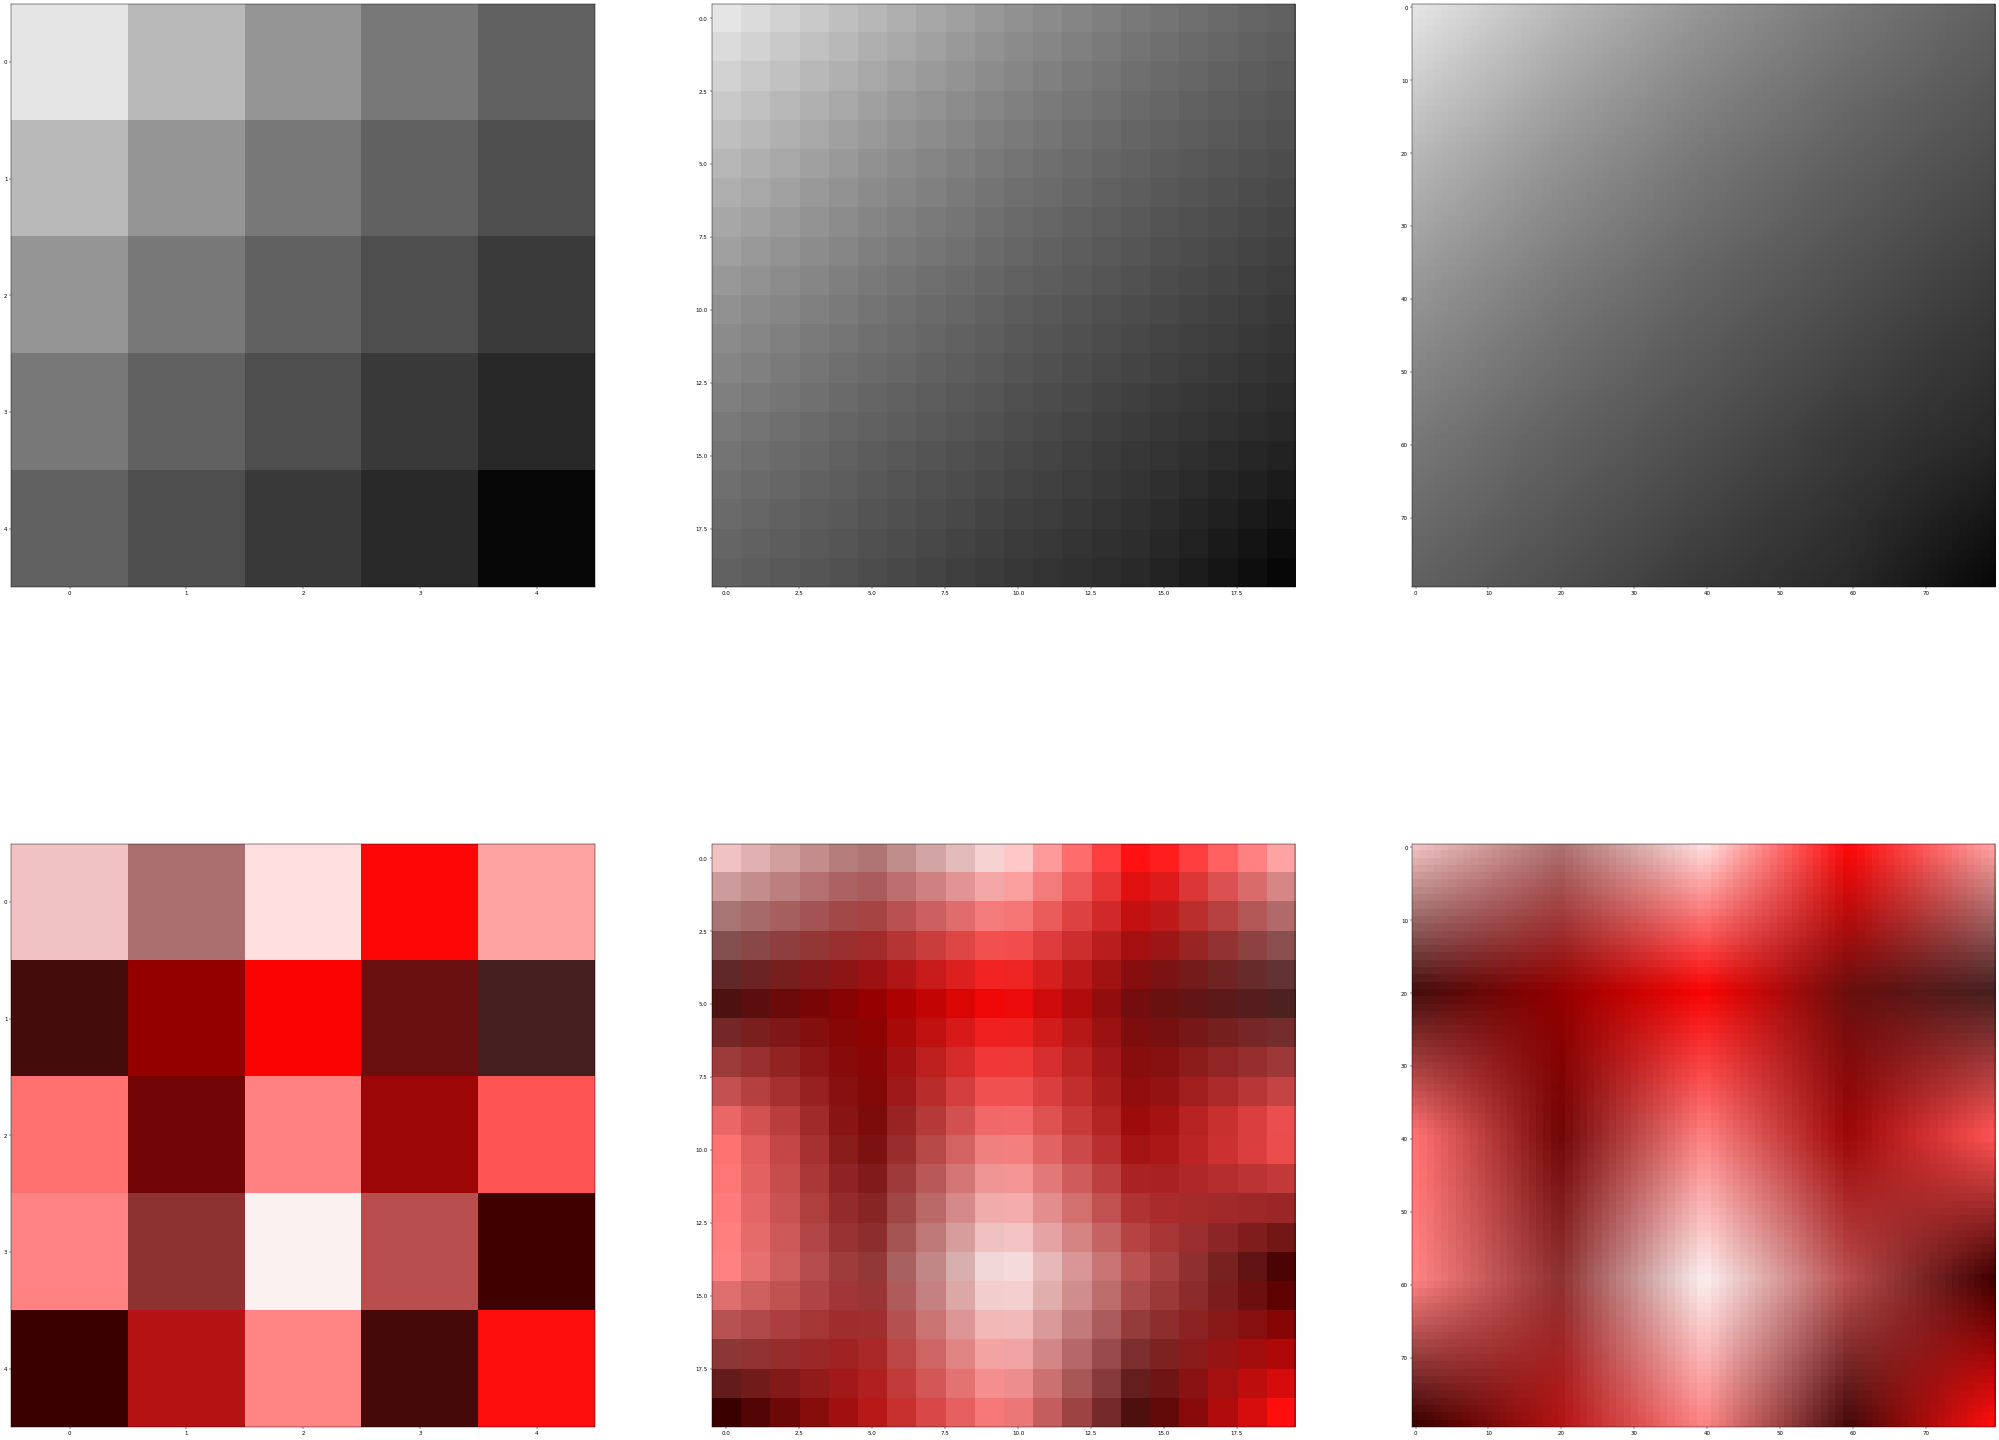

In [275]:
imgGraySc4 = BinLin(imgGrayOrg, 4)
imgGraySc16 = BinLin(imgGrayOrg, 16)
imgRedSc4 = BinLin(imgRedOrg, 4)
imgRedSc16 = BinLin(imgRedOrg, 16)

fig, ax = subplots(2, 3, figsize=(64,50), dpi=40, sharex=False)

ax[0, 0].imshow(imgGrayOrg)
ax[0, 1].imshow(imgGraySc4)
ax[0, 2].imshow(imgGraySc16)
ax[1, 0].imshow(imgRedOrg)
ax[1, 1].imshow(imgRedSc4)
ax[1, 2].imshow(imgRedSc16)
